# Google Playstore Complete EDA

### `Description:`
This dataset was downloaded from kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

### `Context:`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

### `Content:`
Each app (row) has values for catergory, rating, size, and more.

### `Acknowledgements:`
This information is scraped from the Google Play Store. This app information would not be available without it.

### `Inspiration:`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline  

## 2. Importing, Exploring & Cleaning Data:
* Import the csv file with the pandas
* Creating the dataframe and understanding the data present in the dataset using pandas
* Dealing with the missing data, outliers and the incorrect records

### 2.1 Importing Data:
* Import the csv file with the pandas

In [2]:

df = pd.read_csv('./data/google_playstore.csv')

### 2.2 Exploring Data

* Viewing the first five Rows of the data


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [4]:
# set options to be maximum for rows & columns (to avoid missing rows/columns)

# this is to display all the columns in the dataframe
pd.set_option('display.max_columns', None)
# this is to display all the rows in the dataframe
pd.set_option('display.max_rows', None)

In [5]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

* Let's see the exact `Column Names` which can be easily copied later on from Google Playstore Dataset


In [6]:
df.columns  # all columns names  (OR)
print(f"The names of the columns in this datasets are as follows: {df.columns}")

The names of the columns in this datasets are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


* Let's have a look on the `Shape` of the dataset

In [7]:
df.shape  # (rows, columns) > (10841, 13)    (OR)
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are 10841, and columns are 13


* Not enough, let's have a look on the `Columns & their Data Types` using detailed info function

In [8]:
df.info()  # info about columns & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Observations:
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'`

* ### Let's check `Numeric Columns` in the dataset:

In [9]:
df.describe() 

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# Observations:
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric.
1. ~~Rating~~
2. ~~Reviews~~
3. Size
4. Installs
5. Price 

- We must convert them to numeric data type in data wrangling process.
- So, we first need to find anomalies that causes this issue 

## 1. Let's clean the `Size` column first:

In [10]:
# Check for Value Counts of each column:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                   

In [11]:
# Check for Unique Values:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# Observations:
There are several uniques values in the Size column, we have to first make the unit into one common unit from M and K to bytes, and then remove the M and K from the values and convert them into numeric data type.

👉🏼 we have 3 measuring units for size column: 
1. 'M'
2. 'k' 
3. 'varies with device'

👉🏼 let's convert all sizes to M, so that they are comparable

1. convert 'K' (kb) into 'M' (mb)
2. remove 'varies with size'
3. then remove 'M' from the column to make it numeric column

In [12]:
# Let's check for Missing Values in size column:
df['Size'].isnull().sum()  

0

* No missing values, we're good to go

In [13]:
# Find the values in size column which has 'M' in it:
df['Size'].loc[df['Size'].str.contains('M')].value_counts() # separate value counts
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum() # total values with 'M' 

8830

In [14]:
# Find the values in size column which has 'k' in it:
df['Size'].loc[df['Size'].str.contains('k')].value_counts() # separate value counts
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum() # total values with 'k' 

316

In [15]:
# find the values in size column which has 'Varies with device' in it:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts() # separate value counts
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum() # total values with 'Varies with device' 

1695

# Observations:
- We have 8830 values in M units
- We have 316 values in k units
- We have 1695 value in Varies with device

In [16]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

* We have `10841` values in 'Size' column. (which is equal to the original length of data)

### Let's convert the `M` and `k` units into `bytes` and then `remove the M and K` from the values and `convert them into numeric` data type.

In [17]:
# Convert the whole 'Size' column into into bytes
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# if the value is 'Varies with device' then replace it with NaN

# let's define a function:

def convert_size(size):
        # add function details here
        # if size contains 'k' or 'K' multiply by 1024
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', "")) * 1024 # KB --> Bytes
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024 # MB --> Bytes
        elif 'Varies with device' in size:
            return np.nan  # replace 'varies with device' --> nan
    return size
# Let's apply this function
df['Size'] = df['Size'].apply(convert_size) # apply the function to the size column

In [18]:
# Let's check the value counts again:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

* Size column has been converted to 'float' values, and 'Varies with size' replace with 'NaN'

In [19]:
# Rename the column name 'Size' to 'Size (bytes)'
df.rename(columns={'Size': "Size (bytes)"}, inplace=True)

In [20]:
df.head()

# observations:
# column name (Size) convert to Size (bytes)

,App,Category,Rating,Reviews,Size (bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# Making a new column called 'Size_in_Mb' which will have the size in Mb:
df['Size_in_Mb'] = df['Size (bytes)'].apply(lambda x: x/(1024*1024))

# Making a new column called 'Size_in_Kb' which will have the size in Kb:
df['Size_in_Kb'] = df['Size (bytes)'].apply(lambda x: x/(1024))

In [22]:
df.head()  # Bytes converted to Mbs & Kbs in separate columns

,App,Category,Rating,Reviews,Size (bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


# Observations:
- Now we have converted every value into bytes and removed the M and K from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

## 2. Let's clean the `Installs` column now:

In [23]:
# let's have a values counts

df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [24]:
# Total values in 'Installs' column

df['Installs'].value_counts().sum()

10841

In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
# Let's check for Missing Values:
df['Installs'].isnull()
df['Installs'].isnull().sum()

0

* No missing value, we're good to go

# Observations:

1. Remove '`+`' sign from 'Installs' column
2. Remove '`,`' sign from 'Installs' column
3. `Convert` 'Installs' column `to integer`

### (i). Remove '`+`' sign:

In [27]:
# Let's remove the '+' sign from 'Installs' column and convert it to numeric:

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)
df['Installs'].value_counts()  

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             908
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

* plus '`+`' sign has been removed from the 'Installs' column

### (ii). Remove commas '`,`' sign:


In [28]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)
df['Installs'].value_counts()  

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

* commas '`,`' sign has been removed from the 'Installs' column

### (iii). Convert the column into an `intger`
- Let's convert the 'Installs' column to '`numeric`' column (because this is the number of installs/count)


In [29]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df['Installs'].value_counts()  

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

* 'Installs' column has been converted to an '`integer`'

* `Let's verify` if the dtypes has been changes and the + and , sign has been removed

In [30]:
# check the head of the dataframe
df.describe()

,Rating,Reviews,Size (bytes),Installs,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [31]:
# this will show the data type of the column
df['Installs'].dtype 

dtype('int64')

* 'Installs' column converted to numeric column, as shown above ☝🏻

## 3. Let's clean the `Price` column now:

In [32]:
# Check the 'Value Counts' of the 'Price' column:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [33]:
# # check the unique values in the 'Price' column:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
# Let's check for Missing Values:
df['Price'].isnull().sum()

0

* No Null Values in 'Price' column

# Observations:
- We just need to replace / remove '`$`' Sign
- 

In [35]:
#  Let's see how many values have not '$' sign in the 'Price' column:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [36]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

# Observations:
- `~` sign shows `don't show` this
- 800 values with '$' sign
- 10041 values contains '0' but does not contain '$' sign
- `800+10041=10841` Total values
- Now we are confirmed that the only currency used is '$' in the 'Price' column or 0 value
- The `only problem is $` sign 
- Let's `remove it` and `convert` the column `into numeric` data type.

In [37]:
# Let's remove/replace the dollar '$' sign from the 'Price' column and convert it to numeric

# By using 'lambda function':
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x) # replace '$' with '' if '$' in the string else keep the value as it is

# Check Value Counts to confirm:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

* `$` sign successfully removed

In [38]:
# Now let's convert 'Price'' column to numeric column:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [39]:
# Let's check the data type of the column:
df['Price'].value_counts()  

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [40]:
# this will show the data type of the column
df['Price'].dtype 

dtype('float64')

# Observations:
- Column has been converted to an integer
- Instead of integers we convert into float - as prices are in continues value

In [41]:
# Lets Check/Confirm:
df.describe()

,Rating,Reviews,Size (bytes),Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


### **`Finally we've been cleaned the dataset & converted 3 columns into numeric column & remove abnormalities`**

In [42]:
# using f string to print the min, max and average price of the apps
print(f"The minimum price of an app is {df['Price'].min()}")  # Auto suggest
print(f"The maximum price of an app is {df['Price'].max()}")  # Auto suggest
print(f"The average price of an app is {df['Price'].mean()}") # Auto suggest

The minimum price of an app is 0.0
The maximum price of an app is 400.0
The average price of an app is 1.0272733142699015


# Descriptive Statistics: 

### For example:

In [43]:
df.describe()

,Rating,Reviews,Size (bytes),Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


# Observations:
- Now, we have only `7 columns as numeric data` type.
- We can observe their descriptive statistics. and make tons of observations as per our hypothesis.
- We can see that the `Rating` column has a `minimum value of 1` and a `maximum value of 5`, which is the range of rating, and the `mean is 4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a `minimum value of 0` and a `maximum value` of 78,158,306 `78+ Millions`, which is the range of reviews, and the `mean is 444,111.93` which is a good number of reviews. 
  - On an average people give this number of reviews to the apps. 
  - But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

# Dealing with the `Missing Values`:
- Dealing with the missing values is one of the most important part of the data wrangling process
- We must deal with the missing values in order to get the correct insights from the data.

In [44]:
# Let's have a look on the missing values in the dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size (bytes)      1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_Mb        1695
Size_in_Kb        1695
dtype: int64

In [45]:
# This will show the number of null values in each column in 'descending order'
df.isnull().sum().sort_values(ascending=False) 

Size (bytes)      1695
Size_in_Mb        1695
Size_in_Kb        1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
Genres               1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [46]:
# This will show the total number of null values in the dataframe
df.isnull().sum().sum() 

6571

In [47]:
# This will show the percentage of null values in each column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) 

Size (bytes)      15.635089
Size_in_Mb        15.635089
Size_in_Kb        15.635089
Rating            13.596532
Current Ver        0.073794
Android Ver        0.018448
Type               0.009224
Genres             0.009224
App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
dtype: float64

#### Let's `Plot` the missing values in the dataset:

<Axes: >

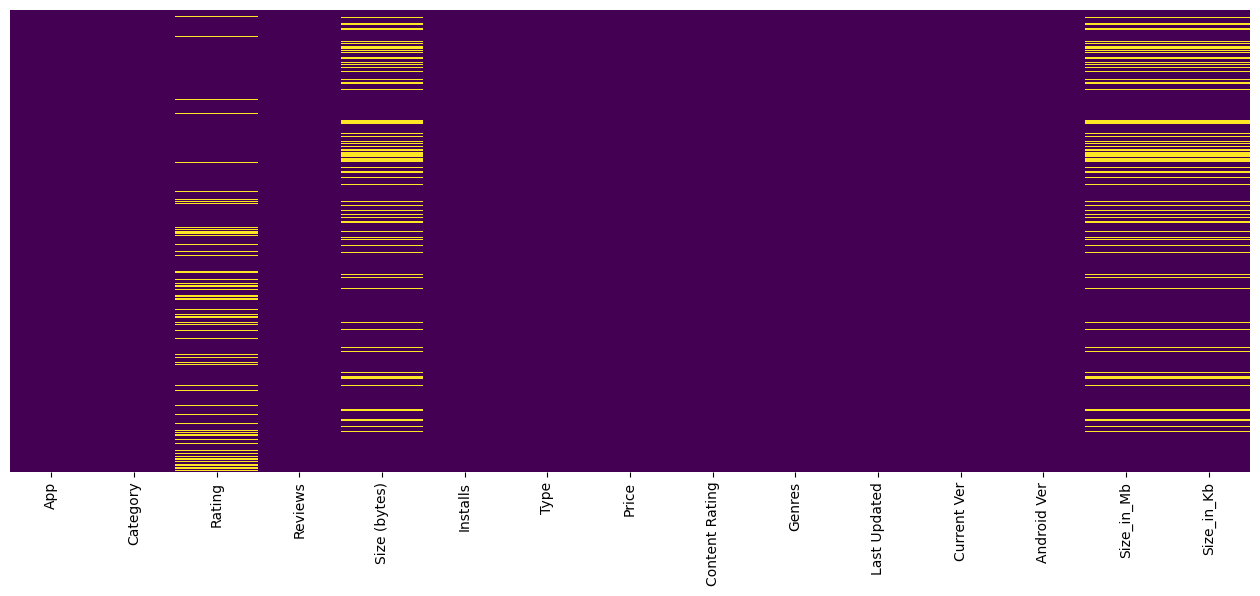

In [48]:
# Make a figure size:
plt.figure(figsize=(16, 6))

# Plot the null values in each column:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

#### There is another way, let's `Plot` the missing values `by percentage`:

Text(0.5, 1.0, 'Percentage of Missing Values in each column')

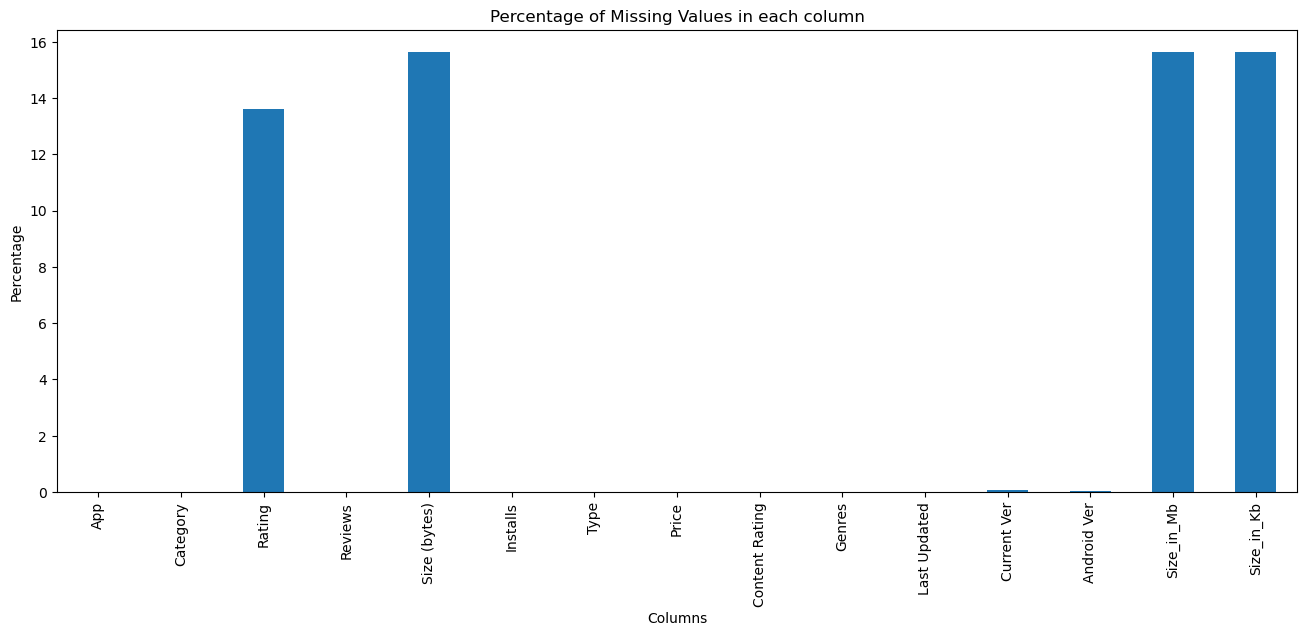

In [49]:
# Make figure size
plt.figure(figsize=(16, 6))

# Plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')

# Add the labels:
plt.xlabel('Columns')  
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each column')

- Let's plot the missing values other than '`Rating', 'Size_in_bytes'` and `'Size_in_Mb'` column
- We have missing percentage columns other than rating having `less than one percent` of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

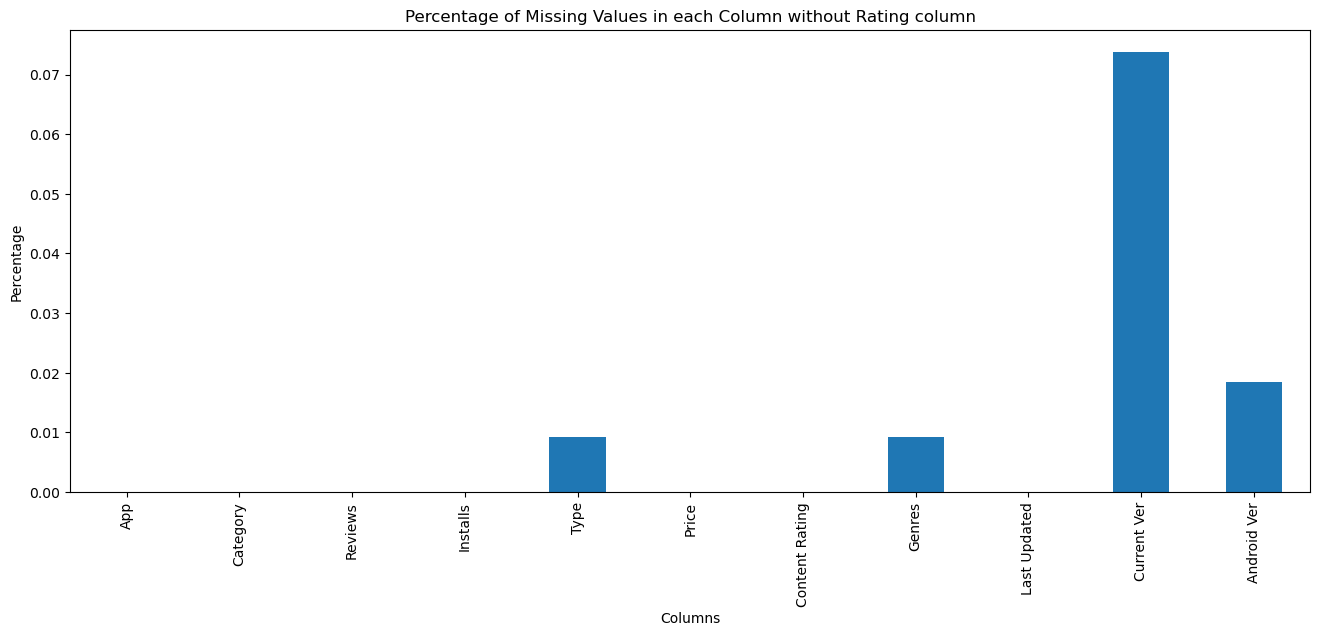

In [50]:
# Missing values with percentage less than 1:

# Make figure size
plt.figure(figsize=(16, 6))

# Plot the null values by their percentage in each column
missing_percentage[missing_percentage < 1].plot(kind='bar')

# Add the x-axis labels
plt.xlabel('Columns') 

# Add the labels for y-axis
plt.ylabel('Percentage') 

# add the title for the plot
plt.title('Percentage of Missing Values in each Column without Rating column')

---
# Observations:
- We have `1695 missing values` in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is `15.6%` of the total values in the column.
- We have `1474 missing values` in the `'Rating'` column, which is `13.6%` of the total values in the column.
- We have `8 missing value` in the `'Current Ver'` column, which is `0.07%` of the total values in the column.
- We have `2 missing values` in the `'Android Ver'` column, which is `0.01%` of the total values in the column.
- We have only `1 missing value` in `Category`, `Type` and `Genres` columns, which is `0.009%` of the total values in the column.
---

# Dealing with the missing values:
We can not impute the `Rating` column as is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.

### Let's run the correlations

In [51]:
# These are numeric columns
df.describe() 

,Rating,Reviews,Size (bytes),Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


<Axes: >

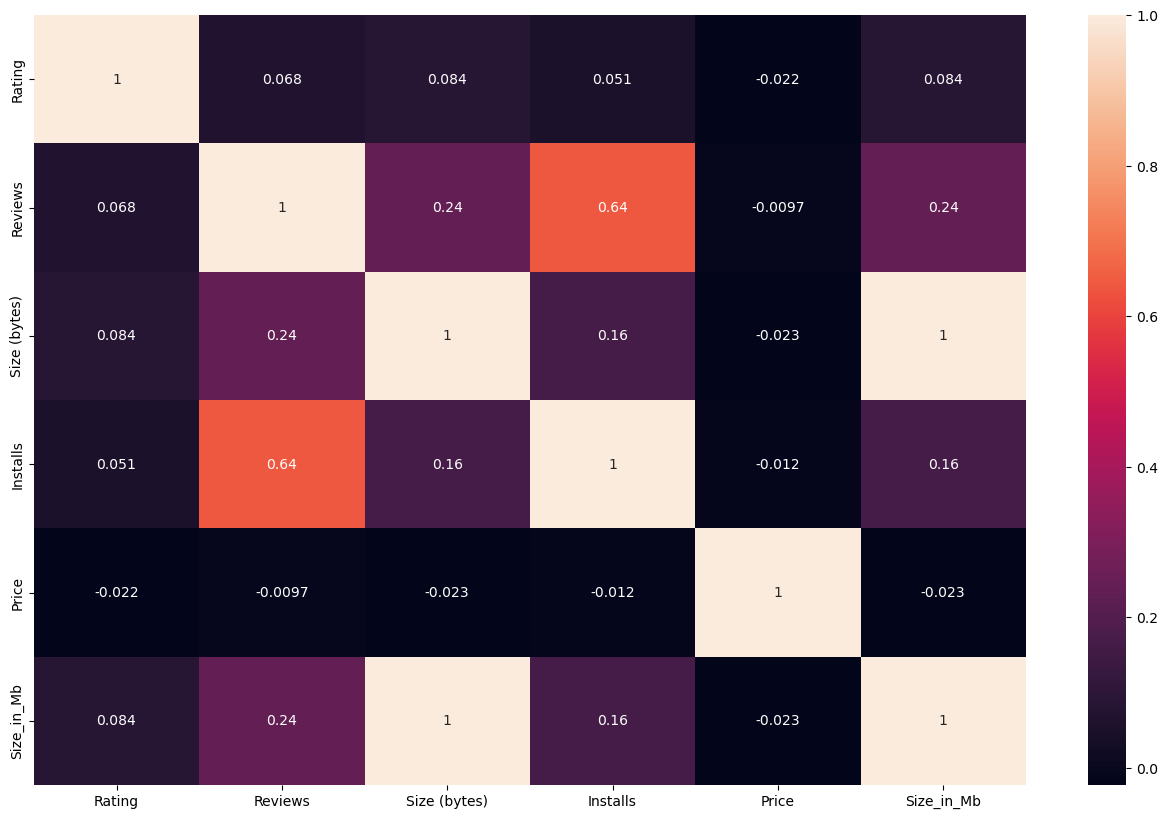

In [52]:
# Make a correlation matrix of numeric columns

# Make figure size
plt.figure(figsize=(16, 10))   

# Make a list of numeric columns
numeric_cols = ['Rating', 'Reviews', 'Size (bytes)', 'Installs', 'Price', 'Size_in_Mb'] 

# Plot the correlation matrix
sns.heatmap(df[numeric_cols].corr(), annot=True) 

---
# Observations:
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an app with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size (Mb)` or `Size (bytes)` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

In [53]:
# We can also calculate the correlation matrix using pandas
df[numeric_cols].corr() 

,Rating,Reviews,Size (bytes),Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size (bytes),0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


* This is showing the correlation matrix (through pandas)

In [54]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


### Missing Values

In [55]:
# Let's calculate the missing values in Data Frame
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size (bytes)      1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_Mb        1695
Size_in_Kb        1695
dtype: int64

- Before going ahead, let's remove the rows with missing values in the `Current Ver, Android Ver, Category, Type` and `Genres` columns
- As they are very less in number and will not affect our analysis.

In [56]:
# Length (of df) before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [57]:
# Remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [58]:
# Length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver, Android Ver, Category, Type` and `Genres` columns.

In [59]:
# Let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size (bytes)      1694
Size_in_Mb        1694
Size_in_Kb        1694
Rating            1469
App                  0
Category             0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [60]:
df = df.rename(columns={'Size (bytes)': 'Size_in_Bytes'})

---
# Observations:
- Only `Rating` and `Size_in_Bytes` or `Size_in_Mb` or `Size_in_Kb` columns are left with missing values.
- We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
- In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_Kb'],
      dtype='object')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [62]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [63]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [64]:
# Use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# Assignemt: 
- Replace the respective missing values of '`Rating`', with respect to the average give in each '`Installs Category`'!

In [65]:
df['Rating'].isnull().sum()

1469

In [66]:
# In which 'Install_category' the Rating has 'NaN' values:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

* Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

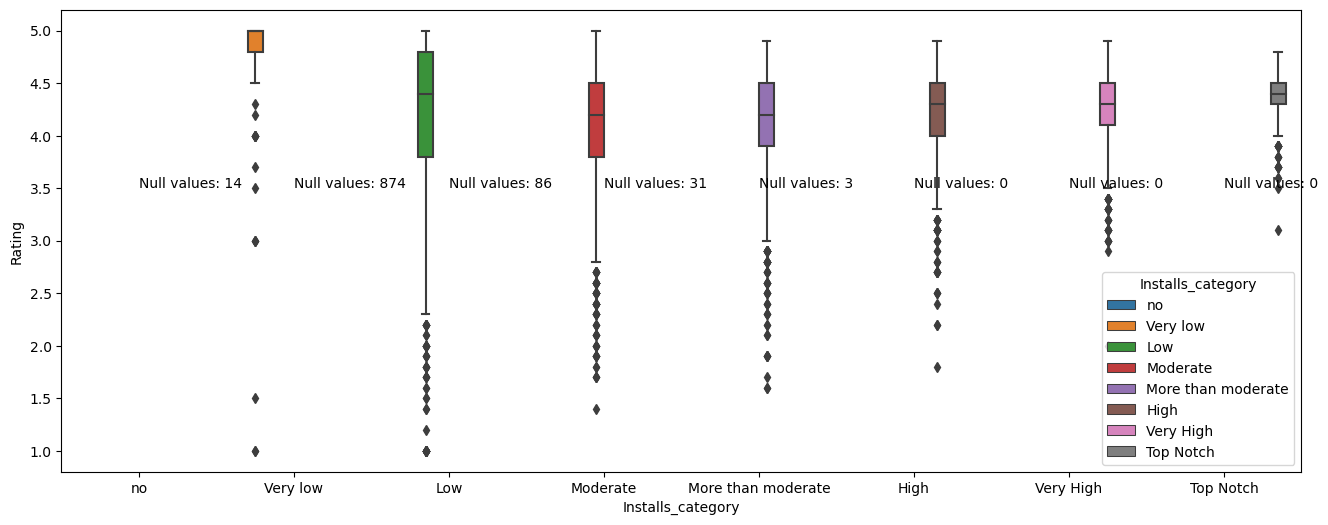

In [67]:
# Plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot

# Add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

* Let's check if there is any similar link with 'Reviews' as wel

In [68]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

* There are no Null values in 'Reviews'

<Axes: xlabel='Installs_category', ylabel='Reviews'>

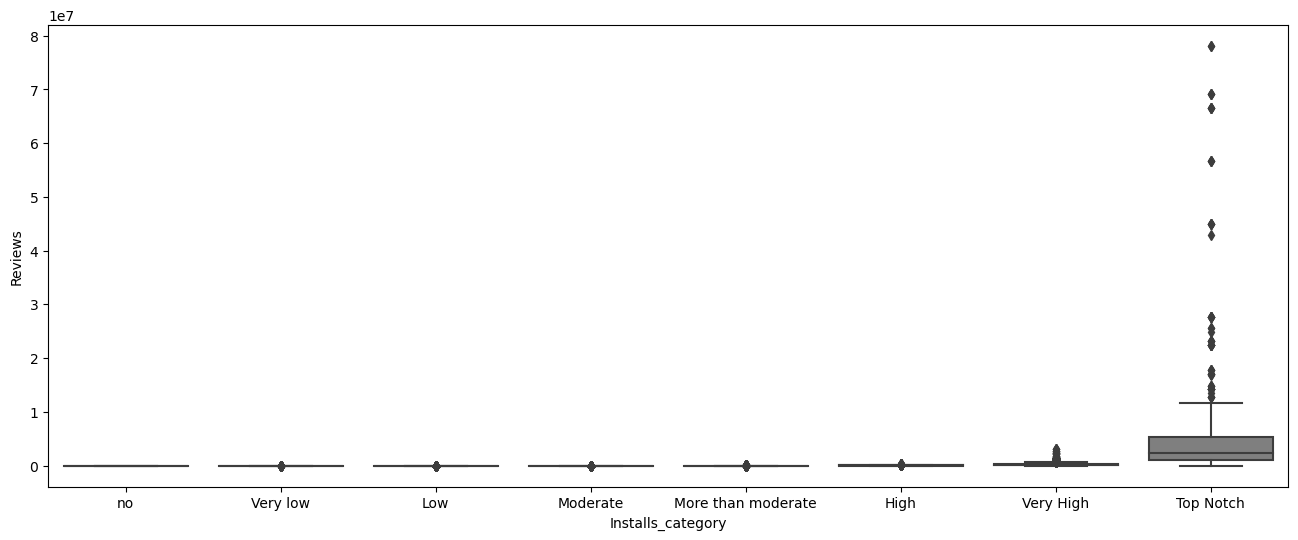

In [69]:
# Let's plot the same plots for 'Reviews' column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

* The data looks really imbalance, let's normalize the data using `log transformation`

<Axes: xlabel='Installs_category', ylabel='Reviews'>

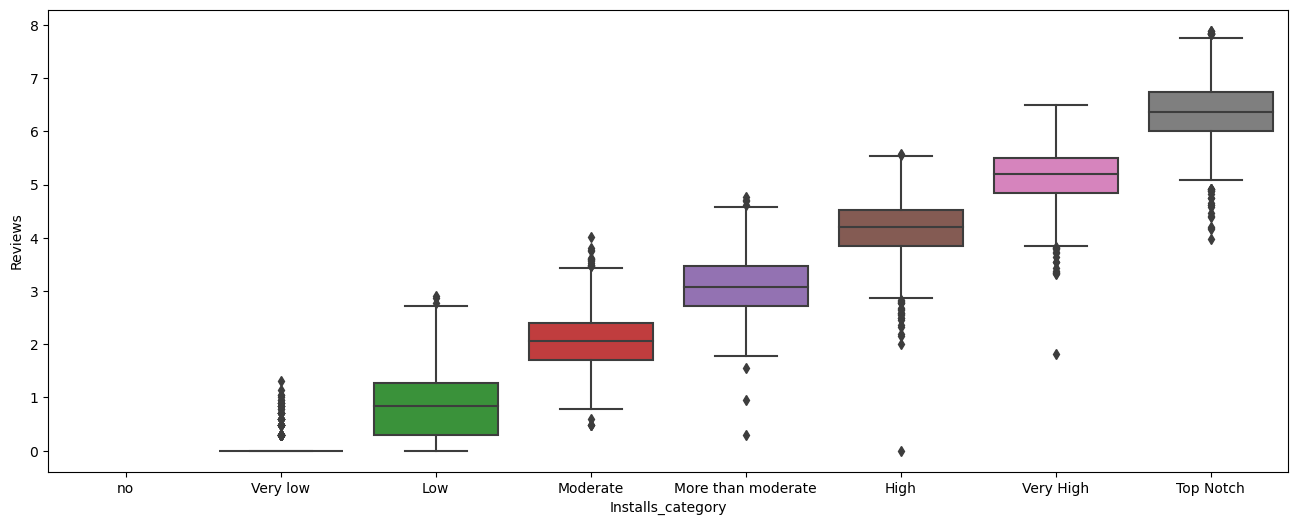

In [70]:
# Let's plot the same plots for 'Reviews' column as well

plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

* We also draw the scatter plot of the Rating and Review columns with the Installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

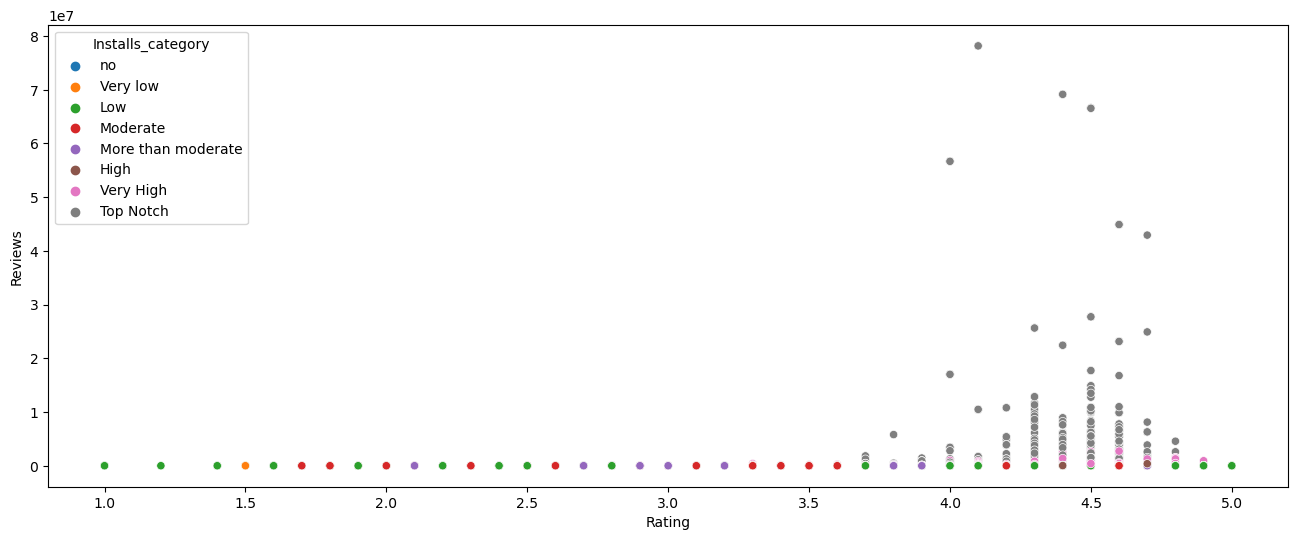

In [71]:
# Draw a 'scatter plot' between Rating, Reviews & Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

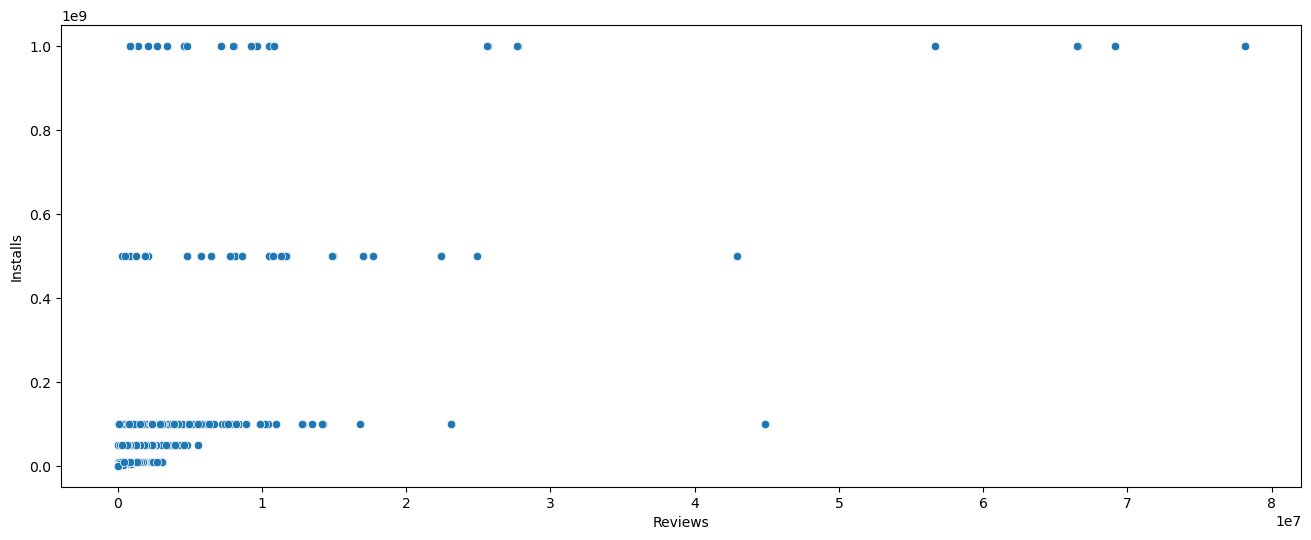

In [72]:
# Plot 'Reviews' and 'Installs' in a scatter plot:

plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

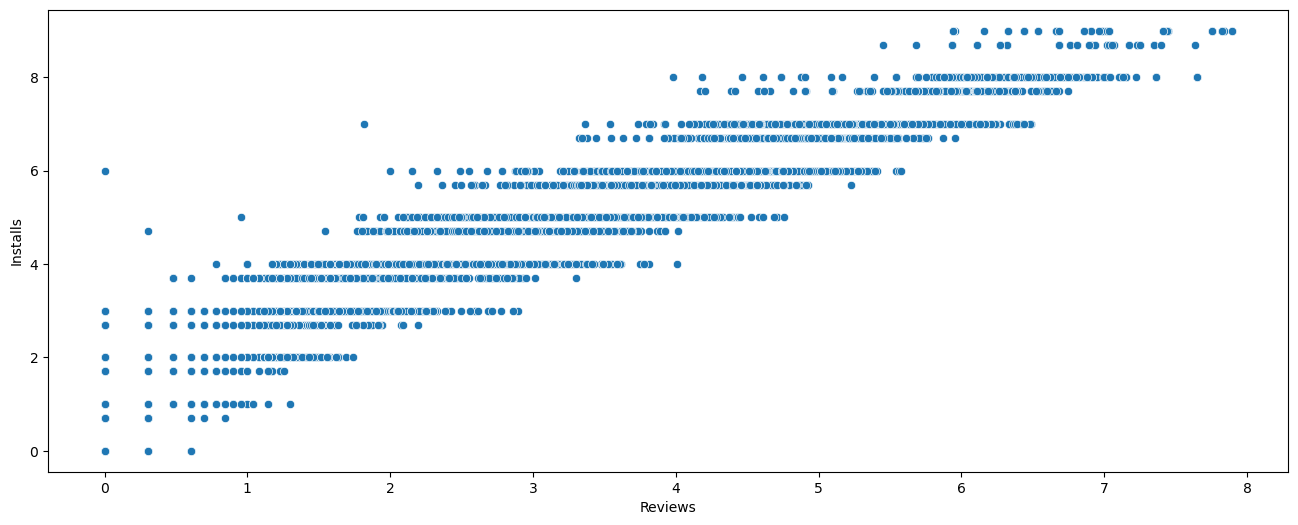

In [73]:
# Plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

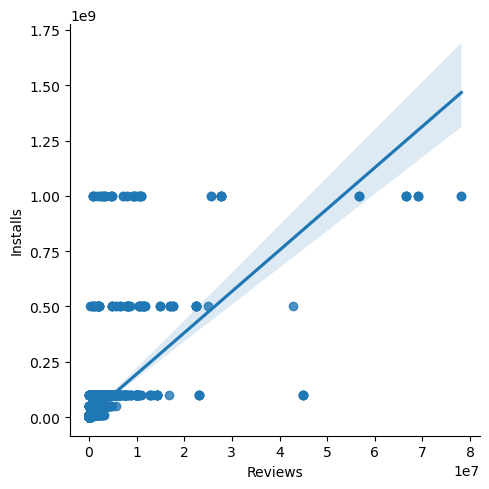

In [74]:
# Plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

- Here, we can see a nice trend, which shows that number of `Reviews` `increases` with the number of `Installs`, which is quite obvious.

# Observations:
- We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

> But wait, we have to check for the `Duplicates` as well, as they can affect our analysis.

# `Duplicates`:
- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [75]:
# find duplicates (if any)
df.duplicated().sum()

483

- This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [76]:
# Find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

Let's check for number of duplicates in each column using a for loop and printing the output:

In [77]:
# Let's check for number of duplicates:
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_Bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Size_in_Kb column are: 10373
Number of duplicates in Installs_category column are: 10821


- This means that the only better way to find duplicates is to check for whole data

In [78]:
# Print the number of duplicates in df:
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [ ]:
# Find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

In [80]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [81]:
# Print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have `removed 483` duplicates from the dataset. and have 10346 rows left.

# Insights from the Data:

## Q1. Which category has the highest number of apps?

In [82]:
# Which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

## Q2. Which category has the highest number of installs?

In [83]:
# Category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

## Q3. Which category has the highest number of reviews?

In [84]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

## Q4. Which category has the highest rating?

In [85]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

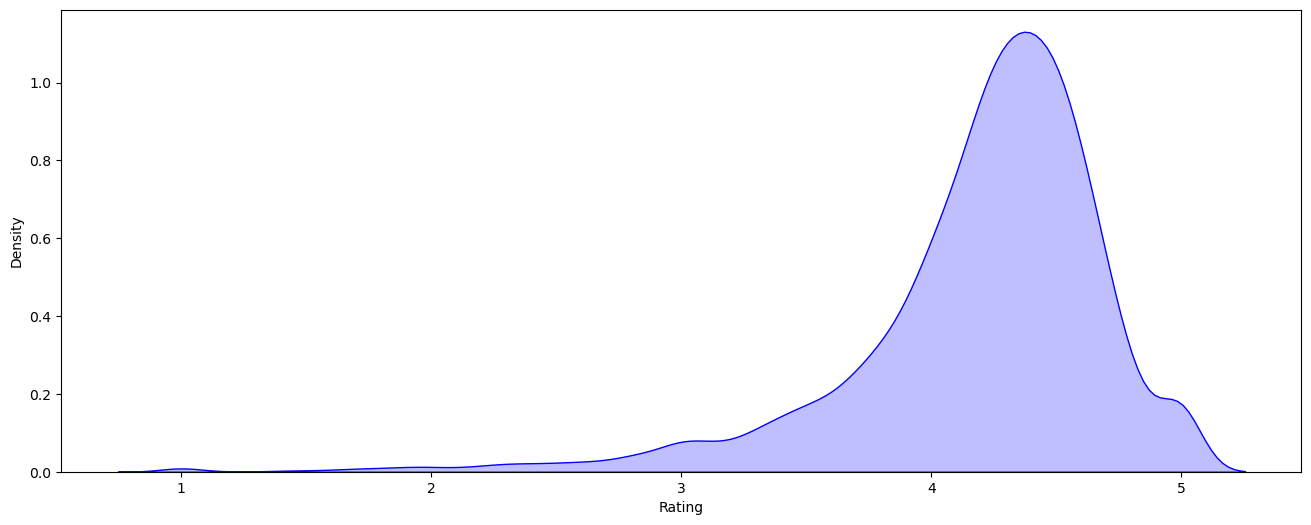

In [86]:
# Plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

## Q5. Plot number of Installs for '`Free vs Paid`' apps & make a bar plot

<Axes: xlabel='Type', ylabel='Installs'>

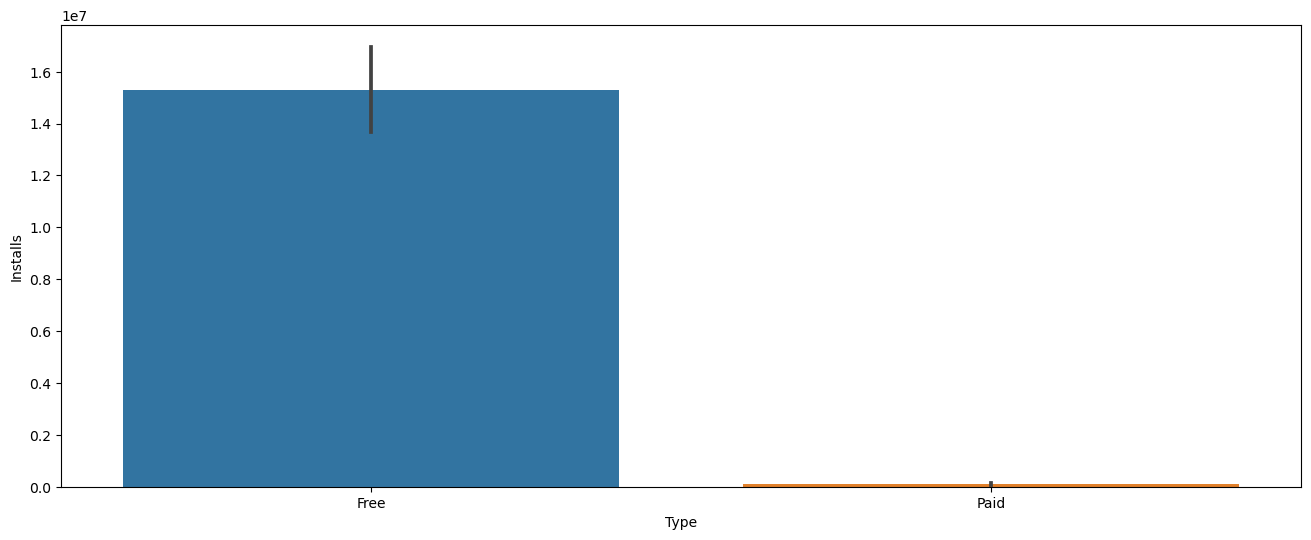

In [87]:
# Plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

<Axes: xlabel='Installs', ylabel='Price'>

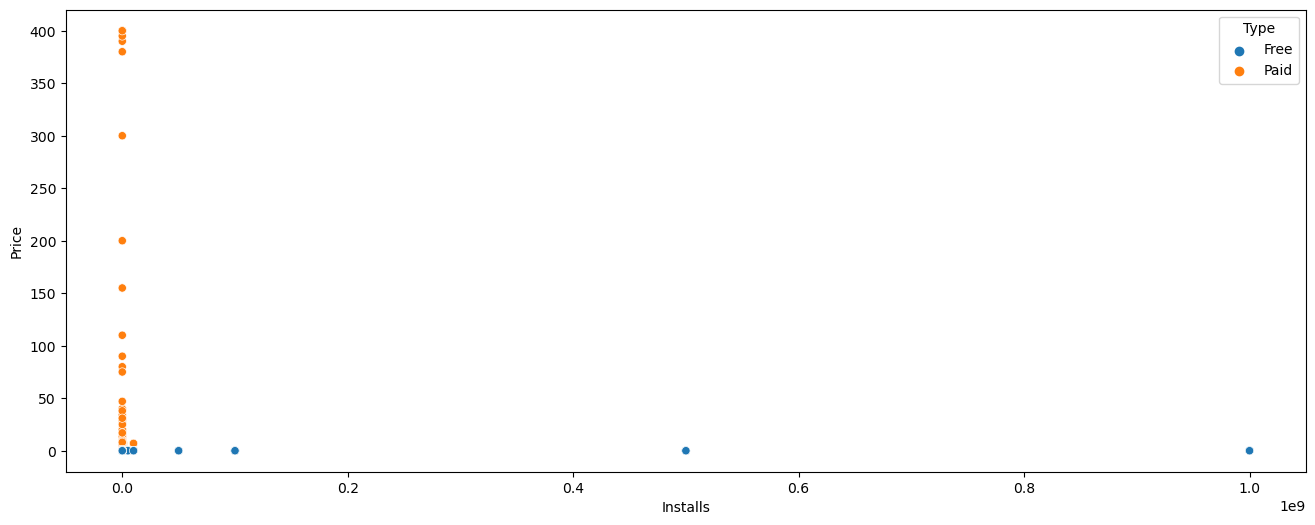

In [88]:
# Show 'scatter plot' as well where x-axis is 'Installs' & y-axis is 'Price' and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

## Q6. Check if there is any impact of'Size' on number of Installs:

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

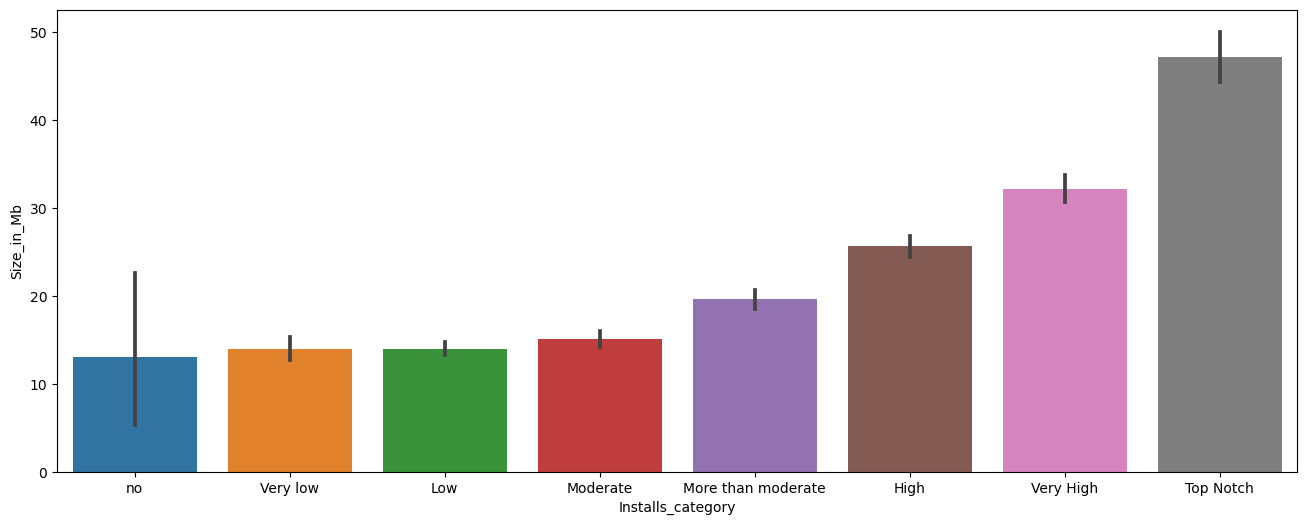

In [89]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

## Q7. Which content rating is most popular in 'Installs':

In [90]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

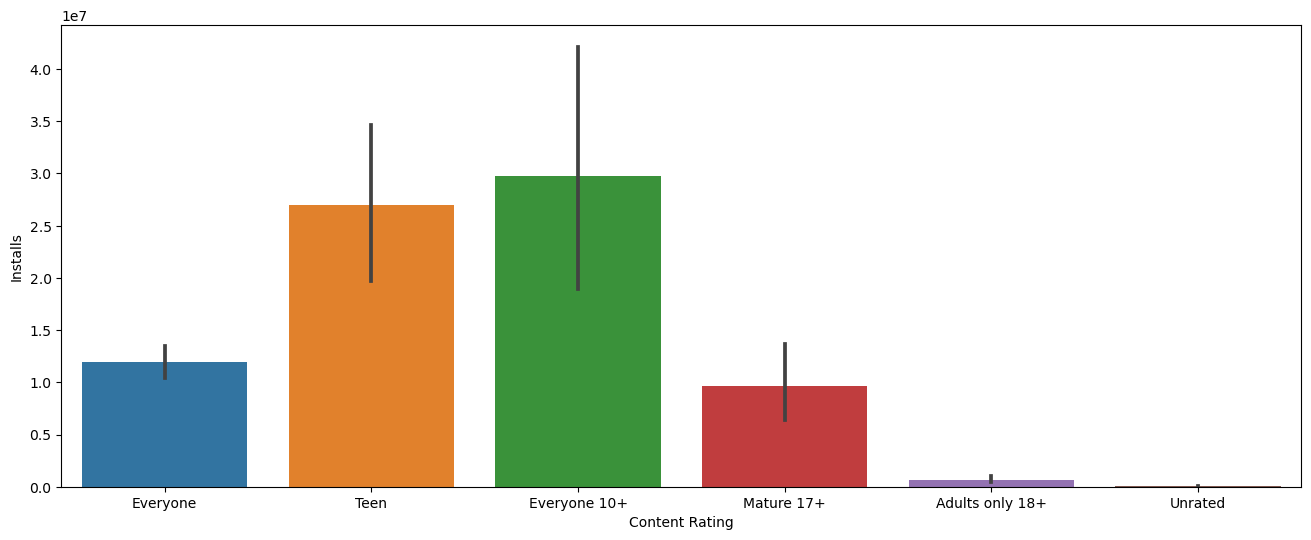

In [91]:
# Plot the bar plot of 'Content Rating' vs 'Installs':

plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

## Q8. Find how many apps are there in 'Everyone' content rating

In [92]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

## Q9. Plot top 5 rated 'Paid' apps:

<Axes: xlabel='App', ylabel='Rating'>

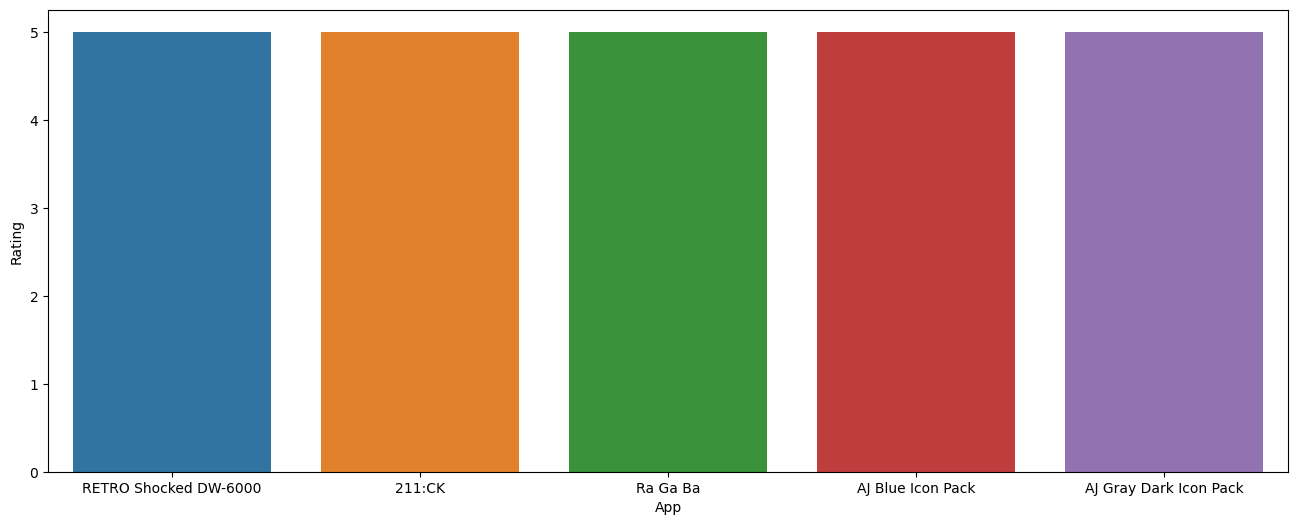

In [93]:
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the ba

In [94]:
# Let's verifiy the above plot by checking the Rating of the apps in the dataframe:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,500.0,Low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,38912.0,Very low
5917,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20.000000,20480.0,Very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,31744.0,Low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,36700160.0,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,35.000000,35840.0,Very low


## Q10. Plot top rated 5 apps in 'Free' category:

<Axes: xlabel='App', ylabel='Rating'>

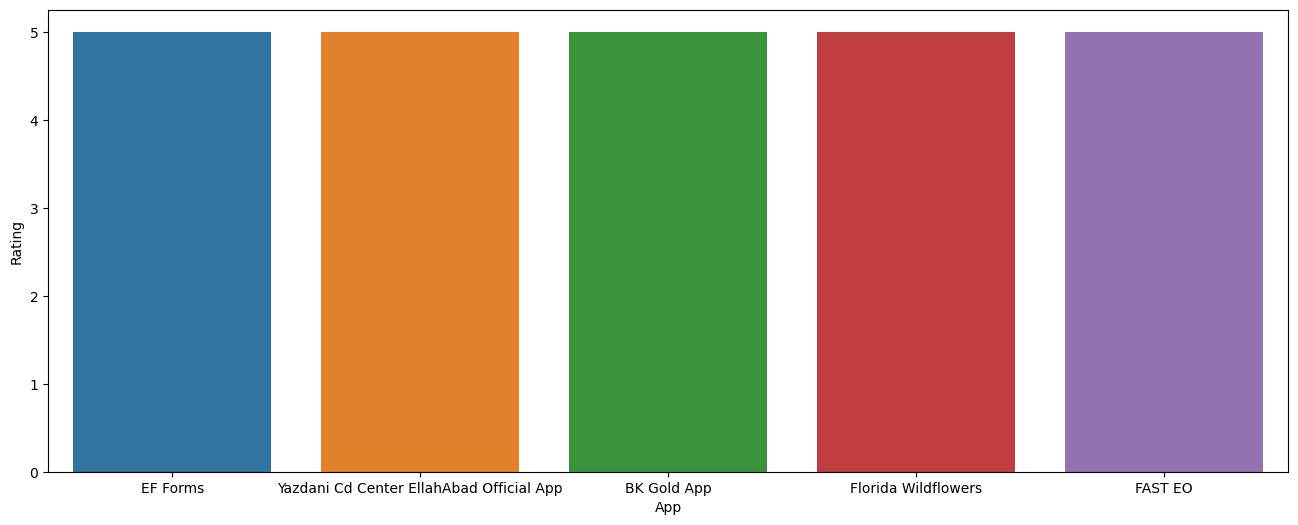

In [95]:
# Plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5))

In [96]:
# Let's verifiy the above plot by checking the Rating of the apps in the dataframe:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
9290,EF Forms,BUSINESS,5.0,2,24117248.0,50,Free,0.0,Everyone,Business,"July 24, 2018",1.29,4.4 and up,23.0,23552.0,Low
7170,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3984588.8,500,Free,0.0,Everyone,Entertainment,"January 12, 2018",2.0,4.0 and up,3.8,3891.2,Low
6398,BK Gold App,FINANCE,5.0,4,11534336.0,50,Free,0.0,Everyone,Finance,"May 25, 2018",1.0.0,4.4 and up,11.0,11264.0,Low
10629,Florida Wildflowers,FAMILY,5.0,5,72351744.0,1000,Free,0.0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,69.0,70656.0,Low
9659,FAST EO,EVENTS,5.0,1,NaN,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up,NaN,NaN,Very low


## Q11. Plot top 5 'FREE' apps with Highest number of reviews:

<Axes: xlabel='App', ylabel='Reviews'>

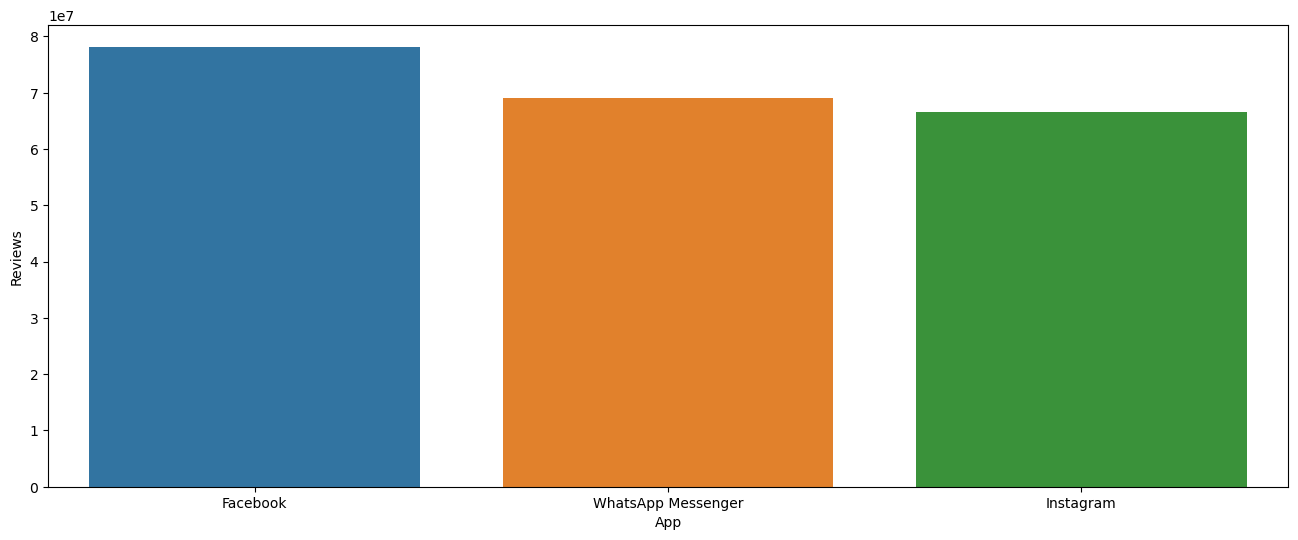

In [97]:
# Plot top 5 FREE apps with highest number of reviews

plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5))

In [98]:
# Let's verifiy the above plot by checking the Reviews of the apps in the dataframe:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch


## Q12. Plot top 5 'Paid' apps with highest number of reviews:

<Axes: xlabel='App', ylabel='Reviews'>

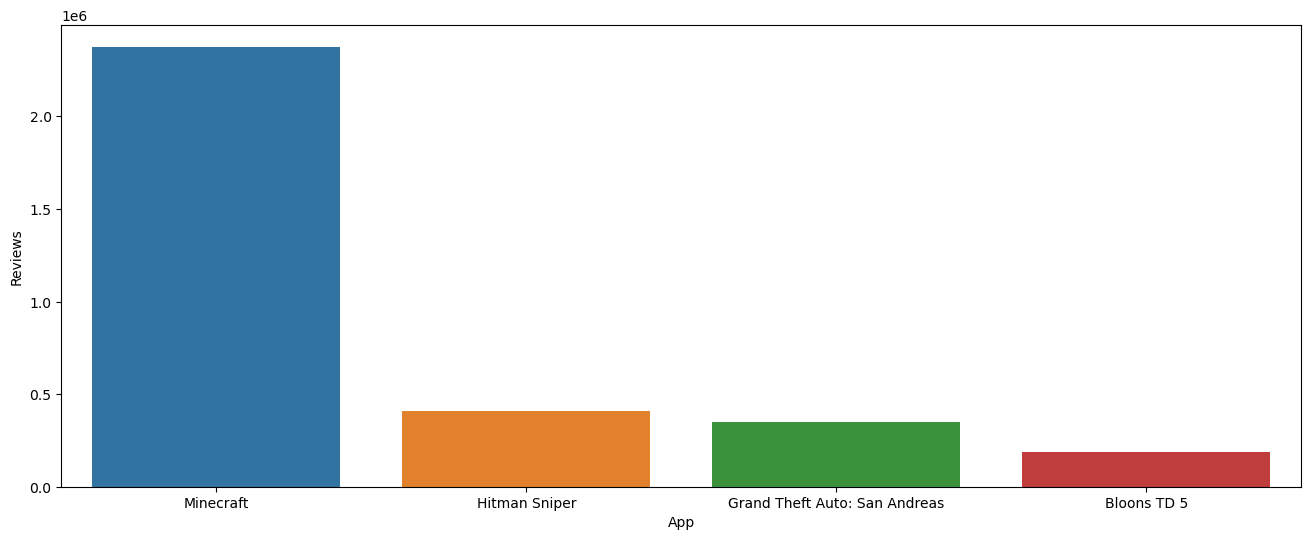

In [99]:
# Plot top 5 Paid apps with highest number of reviews:

plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5))

In [100]:
# Let's verifiy the above plot by checking the Reviews of the apps in the dataframe:
df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,NaN,NaN,Very High
4347,Minecraft,FAMILY,4.5,2375336,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,NaN,NaN,Very High
4034,Hitman Sniper,GAME,4.6,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,29.0,29696.0,Very High
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,27262976.0,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,26.0,26624.0,High
8860,Bloons TD 5,FAMILY,4.6,190086,98566144.0,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,94.0,96256.0,High
